In [77]:
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline


In [78]:
cancer=load_breast_cancer()
print(cancer.DESCR)


Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [79]:
print(cancer.feature_names)
print(cancer.target_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


In [80]:
cancer.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [81]:
cancer.data.shape

(569, 30)

In [84]:
import pandas as pd
df=pd.read_csv('breast-cancer-uci.csv',delimiter=',')
df.tail(300)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
269,8910720,B,10.710,20.39,69.50,344.9,0.10820,0.12890,0.084480,0.028670,...,11.690,25.21,76.51,410.4,0.13350,0.25500,0.253400,0.086000,0.2605,0.08701
270,8910721,B,14.290,16.82,90.30,632.6,0.06429,0.02675,0.007250,0.006250,...,14.910,20.65,94.44,684.6,0.08567,0.05036,0.038660,0.033330,0.2458,0.06120
271,8910748,B,11.290,13.04,72.23,388.0,0.09834,0.07608,0.032650,0.027550,...,12.320,16.18,78.27,457.5,0.13580,0.15070,0.127500,0.087500,0.2733,0.08022
272,8910988,M,21.750,20.99,147.30,1491.0,0.09401,0.19610,0.219500,0.108800,...,28.190,28.18,195.90,2384.0,0.12720,0.47250,0.580700,0.184100,0.2833,0.08858
273,8910996,B,9.742,15.67,61.50,289.9,0.09037,0.04689,0.011030,0.014070,...,10.750,20.88,68.09,355.2,0.14670,0.09370,0.040430,0.051590,0.2841,0.08175
274,8911163,M,17.930,24.48,115.20,998.9,0.08855,0.07027,0.056990,0.047440,...,20.920,34.69,135.10,1320.0,0.13150,0.18060,0.208000,0.113600,0.2504,0.07948
275,8911164,B,11.890,17.36,76.20,435.6,0.12250,0.07210,0.059290,0.074040,...,12.400,18.99,79.46,472.4,0.13590,0.08368,0.071530,0.089460,0.2220,0.06033
276,8911230,B,11.330,14.16,71.79,396.6,0.09379,0.03872,0.001487,0.003333,...,12.200,18.99,77.37,458.0,0.12590,0.07348,0.004955,0.011110,0.2758,0.06386
277,8911670,M,18.810,19.98,120.90,1102.0,0.08923,0.05884,0.080200,0.058430,...,19.960,24.30,129.00,1236.0,0.12430,0.11600,0.221000,0.129400,0.2567,0.05737
278,8911800,B,13.590,17.84,86.24,572.3,0.07948,0.04052,0.019970,0.012380,...,15.500,26.10,98.91,739.1,0.10500,0.07622,0.106000,0.051850,0.2335,0.06263


In [85]:
df.columns.values

array(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se',
       'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se',
       'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'], dtype=object)

c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


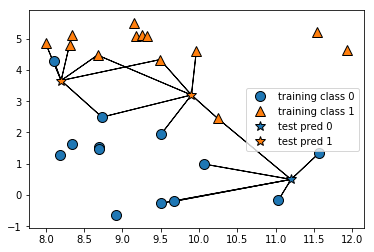

In [38]:
import mglearn
mglearn.plots.plot_knn_classification(n_neighbors=6)

In [15]:
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=42)
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [16]:
print('Accuracy of KNN n-5, on the training set: {:.3f}'.format(knn.score(X_train, y_train)))
print('Accuracy of KNN n-5, on the test set: {:.3f}'.format(knn.score(X_test, y_test)))

Accuracy of KNN n-5, on the training set: 0.946
Accuracy of KNN n-5, on the test set: 0.930


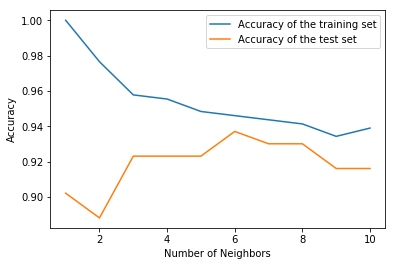

In [10]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)


training_accuracy = []
test_accuracy = []

neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label='Accuracy of the training set')
plt.plot(neighbors_settings, test_accuracy, label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.xticks
plt.legend()

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
pred=log_reg.predict(X_test)
print(metrics.accuracy_score(y_test,pred))
print(metrics.confusion_matrix(y_test,pred))
print(metrics.classification_report(y_test,pred))


0.958041958041958
[[48  5]
 [ 1 89]]
             precision    recall  f1-score   support

          0       0.98      0.91      0.94        53
          1       0.95      0.99      0.97        90

avg / total       0.96      0.96      0.96       143



In [17]:
print('Accuracy on the training subset: {:.3f}'.format(log_reg.score(X_train, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(log_reg.score(X_test, y_test)))

Accuracy on the training subset: 0.953
Accuracy on the test subset: 0.958


In [18]:
log_reg100 = LogisticRegression(C=100)
log_reg100.fit(X_train, y_train)
print('Accuracy on the training subset: {:.3f}'.format(log_reg100.score(X_train, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(log_reg100.score(X_test, y_test)))

Accuracy on the training subset: 0.972
Accuracy on the test subset: 0.965


In [19]:
log_reg001 = LogisticRegression(C=0.01)
log_reg001.fit(X_train, y_train)
print('Accuracy on the training subset: {:.3f}'.format(log_reg001.score(X_train, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(log_reg001.score(X_test, y_test)))

Accuracy on the training subset: 0.934
Accuracy on the test subset: 0.930


w[0]: 0.393906  b: -0.031804


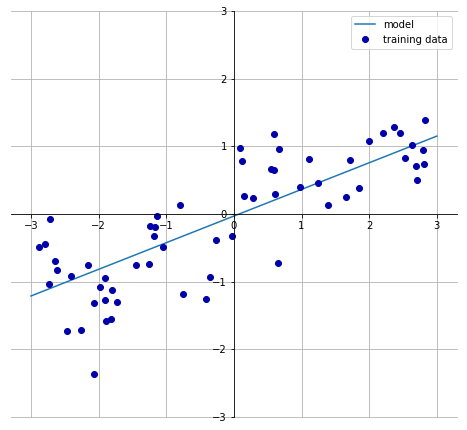

In [15]:
import mglearn 
mglearn.plots.plot_linear_regression_wave()

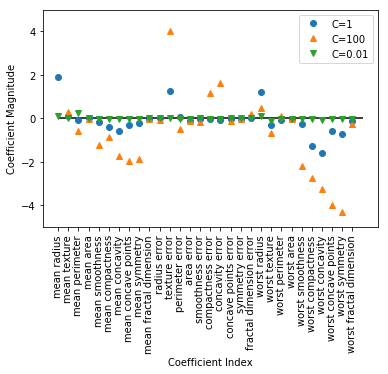

In [20]:
plt.plot(log_reg.coef_.T, 'o', label='C=1')
plt.plot(log_reg100.coef_.T, '^', label='C=100')
plt.plot(log_reg001.coef_.T, 'v', label='C=0.01')
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0,0, cancer.data.shape[1])
plt.ylim(-5,5)
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Magnitude')
plt.legend()

In [55]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
predicted=tree.predict(X_test)
probability=tree.predict_proba(X_test)


tree_accuracy = metrics.accuracy_score(y_test, predicted)  

tree_confus_matrix = metrics.confusion_matrix(y_test, predicted)  
tree_classification_report = metrics.classification_report(y_test, predicted)  
tree_precision = metrics.precision_score(y_test, predicted, pos_label=1)  
tree_recall = metrics.recall_score(y_test, predicted, pos_label=1)  
tree_f1 = metrics.f1_score(y_test, predicted, pos_label=1)

print('Accuracy on the training subset: {:.3f}'.format(tree.score(X_train, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(tree.score(X_test, y_test)))
print(tree_confus_matrix)
print(tree_classification_report)
print(tree_precision)
print(tree_f1)

Accuracy on the training subset: 1.000
Accuracy on the test subset: 0.937
[[49  4]
 [ 5 85]]
             precision    recall  f1-score   support

          0       0.91      0.92      0.92        53
          1       0.96      0.94      0.95        90

avg / total       0.94      0.94      0.94       143

0.9550561797752809
0.9497206703910613


In [18]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print('Accuracy on the training subset: {:.3f}'.format(tree.score(X_train, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(tree.score(X_test, y_test)))

Accuracy on the training subset: 0.988
Accuracy on the test subset: 0.951


In [22]:
import graphviz
from sklearn.tree import export_graphviz

export_graphviz(tree, out_file='cancertree.dot', class_names=['malignant', 'benign'], feature_names=cancer.feature_names,
               impurity=False, filled=True)

In [23]:
print('Feature importances: {}'.format(tree.feature_importances_))
type(tree.feature_importances_)

Feature importances: [0.         0.00752597 0.         0.         0.00903116 0.
 0.00752597 0.         0.         0.         0.00975731 0.04630969
 0.         0.00238745 0.00231135 0.         0.         0.
 0.         0.00668975 0.69546322 0.05383211 0.         0.01354675
 0.         0.         0.01740312 0.11684357 0.01137258 0.        ]


numpy.ndarray

In [21]:
print(cancer.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


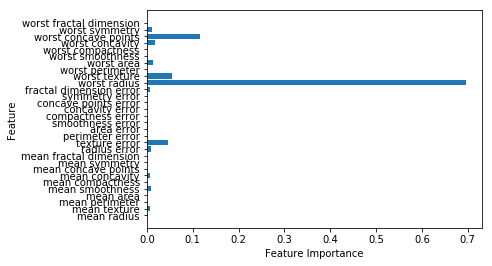

In [24]:
import numpy as np
n_features = cancer.data.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()


In [97]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)
predicted=forest.predict(X_test)
probability=forest.predict_proba(X_test)
rf_accuracy = metrics.accuracy_score(y_test, predicted)    
rf_confus_matrix = metrics.confusion_matrix(y_test, predicted)  
rf_classification_report = metrics.classification_report(y_test, predicted)  
rf_precision = metrics.precision_score(y_test, predicted, pos_label=1)  
rf_recall = metrics.recall_score(y_test, predicted, pos_label=1)  
rf_f1 = metrics.f1_score(y_test, predicted, pos_label=1)
print(rf_accuracy)
print(rf_confus_matrix)
print(rf_classification_report)
print(rf_precision)
print(rf_recall)
print(rf_f1)

print('Accuracy on the training subset: {:.3f}'.format(forest.score(X_train, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(forest.score(X_test, y_test)))


0.972027972027972
[[52  1]
 [ 3 87]]
             precision    recall  f1-score   support

          0       0.95      0.98      0.96        53
          1       0.99      0.97      0.98        90

avg / total       0.97      0.97      0.97       143

0.9886363636363636
0.9666666666666667
0.9775280898876404
Accuracy on the training subset: 1.000
Accuracy on the test subset: 0.972


In [ ]:
url="http://localhost:4996/api"
#Use conda 
import json,requests
data=json.dumps({'mr':0.31,'mt':0.21,'mp':0.86,'ma':0.32,'ms':0.57,'mc':0.68,'mcon':0.59,'mcp':0.38,'msym':0.73,
                 'mfd':0.27,'re':0.49,'te':0.61,'':0.91, 'ae':0.21,'se':0.92,'ce':0.78,'cone':0.11,'cpe':0.18,
                 'syme':0.95,'fde':0.59,'wr':0.73,'wt':0.51,'wp':0.82,'wa':0.95,'ws':0.85,'wc':0.72,'wcon':0.84,
                 'wconp':0.84,'wsym':0.44,'wfd':0.40 })
r=requests.post(url,data)
#Providing random sample input
#malignant(0) and benign(1)

print(r.json())


#Outputs the prediction in the flask server hosted at "http://localhost:9000/api"


In [98]:
#Predicted probabilities for the samples (malignant and benign):
print('Predicted probabilities for the samples (malignant and benign):\n\n{}'.format(forest.predict_proba(X_test_scaled[:5])))

l1=forest.predict_proba(X_test_scaled[:1])
for i in l1:
    for x in i:
        print(x)


Predicted probabilities for the samples (malignant and benign):

[[0.55 0.45]
 [0.29 0.71]
 [0.3  0.7 ]
 [0.36 0.64]
 [0.27 0.73]]
0.55
0.45


In [74]:
import pickle
pickle.dump(forest,open("cancer.pkl","wb"))
random_forest=pickle.load(open("cancer.pkl","rb"))
random_forest

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

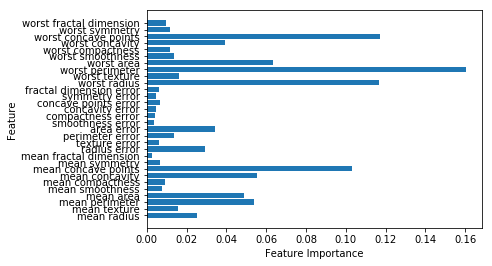

In [27]:
n_features = cancer.data.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()


In [26]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print('Accuracy on the training subset: {:.3f}'.format(mlp.score(X_train, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(mlp.score(X_test, y_test)))

Accuracy on the training subset: 0.906
Accuracy on the test subset: 0.881


In [9]:
print('The maximum per each feature:\n{}'.format(cancer.data.max(axis=0)))

The maximum per each feature:
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit(X_train).transform(X_train)
X_test_scaled = scaler.fit(X_test).transform(X_test)

mlp = MLPClassifier(max_iter=1000, random_state=42)   

mlp.fit(X_train_scaled, y_train)

print('Accuracy on the training subset: {:.3f}'.format(mlp.score(X_train_scaled, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(mlp.score(X_test_scaled, y_test)))

Accuracy on the training subset: 0.995
Accuracy on the test subset: 0.958


In [28]:
mlp=MLPClassifier(max_iter=1000,alpha=1,random_state=42)
mlp.fit(X_train_scaled,y_train)
print("Accuracy on the training subset:{:.3f}".format(mlp.score(X_train_scaled,y_train)))
print('Accuracy on the test subset:{:.3f}'.format(mlp.score(X_test_scaled,y_test)))

Accuracy on the training subset:0.988
Accuracy on the test subset:0.972


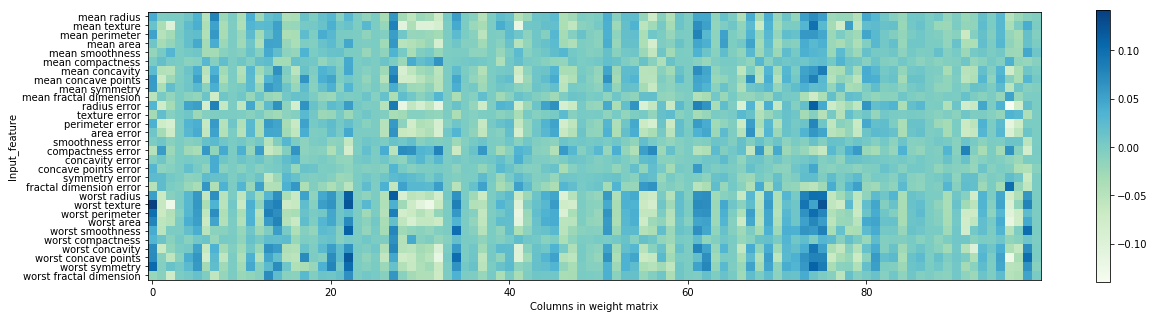

In [13]:
plt.figure(figsize=(20,5))
plt.imshow(mlp.coefs_[0],interpolation='None',cmap='GnBu')
plt.yticks(range(30),cancer.feature_names)
plt.xlabel('Columns in weight matrix')
plt.ylabel('Input_feature')
plt.colorbar()

In [60]:
from sklearn.svm import SVC 
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

svm = SVC()
svm.fit(X_train, y_train)
predicted=svm.predict(X_test)

svm_accuracy = metrics.accuracy_score(y_test, predicted)  

svm_confus_matrix = metrics.confusion_matrix(y_test, predicted)  
svm_classification_report = metrics.classification_report(y_test, predicted)  
svm_precision = metrics.precision_score(y_test, predicted, pos_label=1)  
svm_recall = metrics.recall_score(y_test, predicted, pos_label=1)  
svm_f1 = metrics.f1_score(y_test, predicted, pos_label=1)
print(svm_confus_matrix)
print(svm_classification_report)
print(svm_precision)
print(svm_recall )
print(svm_f1)
print('The accuracy on the training subset: {:.3f}'.format(svm.score(X_train, y_train)))
print('The accuracy on the test subset: {:.3f}'.format(svm.score(X_test, y_test)))

[[ 0 53]
 [ 0 90]]
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        53
          1       0.63      1.00      0.77        90

avg / total       0.40      0.63      0.49       143

0.6293706293706294
1.0
0.7725321888412017
The accuracy on the training subset: 1.000
The accuracy on the test subset: 0.629


c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


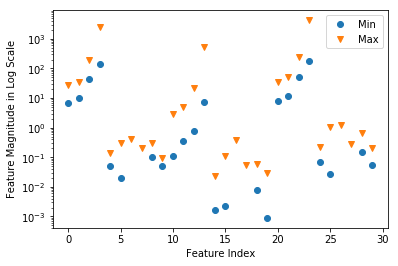

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline 

plt.plot(X_train.min(axis=0), 'o', label='Min')
plt.plot(X_train.max(axis=0), 'v', label='Max')
plt.xlabel('Feature Index')
plt.ylabel('Feature Magnitude in Log Scale')
plt.yscale('log')
plt.legend(loc='upper right')

In [37]:
min_train = X_train.min(axis=0)
range_train = (X_train - min_train).max(axis=0)

X_train_scaled = (X_train - min_train)/range_train

print('Minimum per feature\n{}'.format(X_train_scaled.min(axis=0)))
print('Maximum per feature\n{}'.format(X_train_scaled.max(axis=0)))

Minimum per feature
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Maximum per feature
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [38]:
X_test_scaled = (X_test - min_train)/range_train

svm = SVC()
svm.fit(X_train_scaled, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [39]:
print('The accuracy on the training subset: {:.3f}'.format(svm.score(X_train_scaled, y_train)))
print('The accuracy on the test subset: {:.3f}'.format(svm.score(X_test_scaled, y_test)))

The accuracy on the training subset: 0.948
The accuracy on the test subset: 0.951


In [40]:
svm = SVC(C=1000)
svm.fit(X_train_scaled, y_train)

print('The accuracy on the training subset: {:.3f}'.format(svm.score(X_train_scaled, y_train)))
print('The accuracy on the test subset: {:.3f}'.format(svm.score(X_test_scaled, y_test)))

The accuracy on the training subset: 0.988
The accuracy on the test subset: 0.972


In [41]:
print('The decision function is:\n\n{}'.format(svm.decision_function(X_test_scaled[:20])))

The decision function is:

[ -4.85978922   1.99579027   3.72514352   2.2759514    4.90872748
   3.38738403   5.5791361    3.65809059   4.35247953   7.58641901
   1.03844859   1.83665248   6.57010973   0.18802654   0.78505785
  -3.91506363   3.36498378  -8.28312921  -7.22330097 -13.2443725 ]


In [42]:
print('Thresholded decision function:\n\n{}'.format(svm.decision_function(X_test_scaled[:20])>0))

Thresholded decision function:

[False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True False  True False False False]


In [43]:
svm.classes_

array([0, 1])

In [65]:
import numpy as np
svm = SVC(C=1000, probability=True)
svm.fit(X_train_scaled, y_train)

#Predicted probabilities for the samples (malignant and benign):
print('Predicted probabilities for the samples (malignant and benign):\n\n{}'.format(svm.predict_proba(X_test_scaled[:5])))

l1=svm.predict_proba(X_test_scaled[:1])
for i in l1:
    for x in i:
        print(x)

Predicted probabilities for the samples (malignant and benign):

[[9.96105766e-01 3.89423375e-03]
 [5.90311816e-02 9.40968818e-01]
 [7.65204172e-03 9.92347958e-01]
 [4.27690037e-02 9.57230996e-01]
 [1.01203022e-05 9.99989880e-01]]
0.9961057662508146
0.0038942337491853266
